In [1]:
%cd ..
from src.utils import load_data
from src.algos import *

e:\coding\essa-tsp-metaheuristics


In [2]:
df = load_data('data\TSP_29.xlsx')

In [3]:
s = SimulatedAnnealing(temp=100, alpha=0.9, n_iter=1000, verbose=False)
s.solve(df)

best distance: 2581
algorithm: SIMULATED ANNEALING
n_iter: 1000
solving time: 0.284 s
history: [6411, 6262, 6229, 6072, 6071, 6045, 5984, 5914, 5669, 5596, 5469, 5301, 5149, 4922, 4857, 4784, 4755, 4696, 4656, 4598, 4542, 4502, 4494, 4485, 4452, 4389, 4181, 4028, 3949, 3888, 3611, 3582, 3581, 3580, 3480, 3400, 3376, 3319, 3229, 3179, 3110, 3066, 3052, 3031, 3002, 2986, 2918, 2854, 2837, 2778, 2714, 2694, 2675, 2651, 2609, 2581]

In [4]:
n = NearestNeighbour(verbose=False)
n.solve(df, 14)

best distance: 2293
algorithm: NEAREST NEIGHBOUR
solving time: 0.018 s

In [5]:
t = TabuSearch(verbose=False, tabu_length=4 , n_iter=100)
t.solve(df)

best distance: 2394
algorithm: TABU SEARCH
n_iter: 100
solving time: 10.269 s
history: [5843, 5195, 4840, 4558, 4232, 4024, 3793, 3588, 3477, 3395, 3308, 3227, 3160, 3120, 3041, 2991, 2942, 2806, 2770, 2761, 2611, 2561, 2545, 2469, 2471, 2478, 2485, 2466, 2436, 2417, 2410, 2408, 2407, 2419, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394, 2396, 2403, 2411, 2410, 2408, 2401, 2393, 2394]

In [6]:
h = HillClimber(verbose=False, n_iter=50)
h.solve(df)

best distance: 2133
algorithm: HILL CLIMBER
n_iter: 50
solving time: 3.237 s
history: [5844, 5018, 4552, 4089, 3785, 3505, 3260, 3165, 3081, 3000, 2934, 2892, 2852, 2800, 2639, 2601, 2570, 2479, 2454, 2420, 2373, 2355, 2308, 2178, 2143, 2135, 2133]

In [7]:
hcm = HillClimberMultistart(verbose=False, n_iter=50)
hcm.solve_multistart(df, 40)

best distance: 2154
algorithm: HILL CLIMBER MULTISTART
n_iter: 50
solving time: 93.882 s
history: [6365, 5491, 4963, 4528, 4146, 3884, 3643, 3457, 3315, 3223, 3134, 3045, 2962, 2904, 2866, 2834, 2807, 2734, 2495, 2456, 2303, 2265, 2233, 2154]
No. of starts: 40

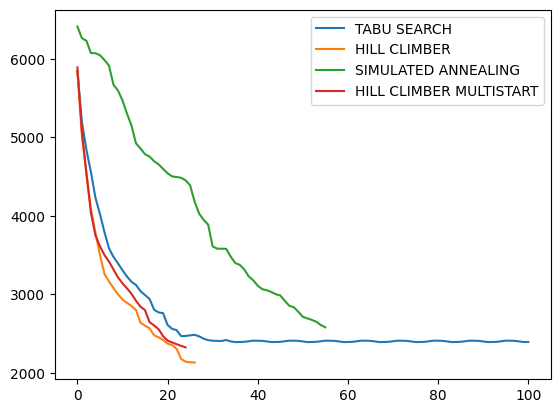

In [8]:
from matplotlib import pyplot as plt
plt.plot(t.history, label=t.NAME)
plt.plot(h.history, label=h.NAME)
plt.plot(s.history, label=s.NAME)
plt.plot(hcm.history, label=hcm.NAME)
plt.legend()